In [19]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
import sklearn.cross_validation

C:\Users\cemgu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
# Let's Download Boston data set 
# And store the dataset in a dataframe

from sklearn.datasets import load_boston
Boston = load_boston()
DF=DataFrame(Boston.data)
DF.columns = Boston.feature_names
DF["Price"]=Boston.target
X=np.vstack(DF.RM)
X = np.array( [ [value,1] for value in X] )



In [3]:
# Create a Linear Regression Object

LRObj= LinearRegression()

In [4]:
# Price is target so Price will be used for Y
# Drop is dropping the Price Column
X_multi = DF.drop("Price",1)
Y = DF.Price

In [5]:
LRObj.fit(X_multi,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
print("Intercept Coefficient is %.2f" %LRObj.intercept_ )
print("The number of coeeficients used %d" %len(LRObj.coef_))

Intercept Coefficient is 36.49
The number of coeeficients used 13


In [7]:
# Let's
CoefDF = DataFrame(DF.columns)
CoefDF.columns=["Features"]

CoefDF["Coefficient Estimate"] = Series(LRObj.coef_)
CoefDF

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


## Check the Highest Correlation :: Rooms!

In [25]:
# Grab the output and set as X and Y test and train data sets!

X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,DF.Price)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(379, 2) (127, 2) (379,) (127,)


## Now we can predict House Prices with training and testing sets


In [27]:
LRObj = LinearRegression()
#I pass another Linear Regression object
# And pass the training sets to create our predictions

LRObj.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#Our predictions are here
Train_Pred = LRObj.predict(X_train)
Test_Pred = LRObj.predict(X_test)

In [31]:
# Mean square error
# Error in our Prediction

print(" Fit a model X_train and calculate MSE with Y train = %.2f" 
      % np.mean((Y_train-Train_Pred)**2) )
print(" Fit a model X_train and calculate MSE with X test and Y test = %.2f" 
      % np.mean((Y_test-Test_Pred)**2) )

 Fit a model X_train and calculate MSE with Y train = 46.65
 Fit a model X_train and calculate MSE with X test and Y test = 34.87


In [ ]:
# In order to check how far we are off with ouur prediction
# We can use Residual Plots
# Res = Observed - Predicted





Text(0.5, 1.0, 'Residual Plot')

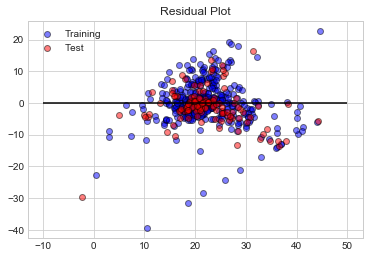

In [42]:
# Residual for Training Set, X = Training Set, Y = Training Set Prediction - Observed Training
# c = Color
# alpha see through
Train = plt.scatter(Train_Pred,(Train_Pred-Y_train),ec="black",c='blue',alpha=0.5)

# Residual for Test Set, X = Test Set, Y = Test Set Prediction - Observed Test
Test = plt.scatter(Test_Pred,(Test_Pred-Y_test),c='red',ec="black",alpha=0.5)

#Horizontal Lines
plt.hlines(y=0,xmin=-10,xmax=50)

plt.legend((Train,Test),("Training","Test"),loc="upper left")

plt.title("Residual Plot")